The `optimize-waterallocation.jl` script optimizes the joint extraction of surface and groundwater withdrawals and reservoir storage to satisfy given water demands.  It produces four files:
- `withdrawals.jld`: The amount withdrawn from each gauge along each canal.
- `returns.jld`: The amount returned to each gauge along each canal.
- `captures.jld`: The amount stored in each reservoir from one period to the next.
- `waterfromgw.jld`: The amount of pumped water from the groundwater for each county.

How does the optimal division between ground and surface water differ from the recorded values?

First, let's take the recorded values.

In [2]:
using DataFrames
df = readtable("../data/extraction/USGS-2010.csv")[:, [:FIPS, :TO_SW, :TO_GW, :TO_To]]

,FIPS,TO_SW,TO_GW,TO_To
1,1001,37.17,18.38,55.55
2,1003,7.01,57.35,64.36
3,1005,4.34,6.71,11.05
4,1007,1.55,6.06,7.61
5,1009,53.04,4.04,57.08
6,1011,0.43,2.76,3.19
7,1013,0.79,3.73,4.52
8,1015,6.8,22.51,29.31
9,1017,4.45,0.95,5.4
10,1019,2.37,3.17,5.54


In [3]:
surfaces = deserialize(open("../data/cache/counties/extraction/withdrawals.jld"));
grounds = deserialize(open("../data/cache/counties/extraction/waterfromgw.jld"))

3109x2 Array{Float64,2}:
 38401.5         38401.5      
 44491.8          3113.7      
  7638.82         7638.82     
  1230.13         5260.76     
     0.0         39459.2      
  2205.23         2205.23     
  3124.66            0.0      
 20202.1         20261.9      
  3733.0          3733.0      
  3829.78         3175.47     
  5060.29          442.333    
     0.0         29649.7      
 16805.4         16805.4      
     ⋮                        
     0.0             0.0      
     0.0         60323.1      
     0.0             0.0      
     0.0             0.0      
     0.0             0.0      
     0.0             1.16971e5
 72937.4        114681.0      
     1.12241e5   51872.9      
     0.0             0.0      
     0.0             0.0      
     0.0             0.0      
 19272.3         19280.2      

Sum these to the county-year level.

In [12]:
drawsdata = read_rda("../data/countydraws.RData", convertdataframes=true);
draws = drawsdata["draws"]

optsw = []
optgw = []
for ii in 1:size(grounds, 1)
    push!(optsw, sum(surfaces[draws[:fips] .== df[ii, :FIPS], :]))
    push!(optgw, sum(grounds[ii, :]))
end

df[:optsw] = optsw / (1382592. / 1000.)
df[:optgw] = optgw / (1382592. / 1000.)
df

,FIPS,TO_SW,TO_GW,TO_To,optsw,optgw
1,1001,37.17,18.38,55.55,0.0,55.55
2,1003,7.01,57.35,64.36,29.927926355402754,34.43207364459724
3,1005,4.34,6.71,11.05,0.0,11.049999999999999
4,1007,1.55,6.06,7.61,2.9152733553631127,4.694726644636887
5,1009,53.04,4.04,57.08,28.54,28.54
6,1011,0.43,2.76,3.19,0.0,3.1899999999999995
7,1013,0.79,3.73,4.52,2.26,2.26
8,1015,6.8,22.51,29.31,0.0432667518520312,29.266733248147965
9,1017,4.45,0.95,5.4,0.0,5.4
10,1019,2.37,3.17,5.54,0.47324811286587337,5.066751887134127


In [13]:
include("../src/lib/graphing.jl")

usmap (generic function with 2 methods)

Where do we have under-allocations-- that is, where the optimized values do not reach the recorded levels?

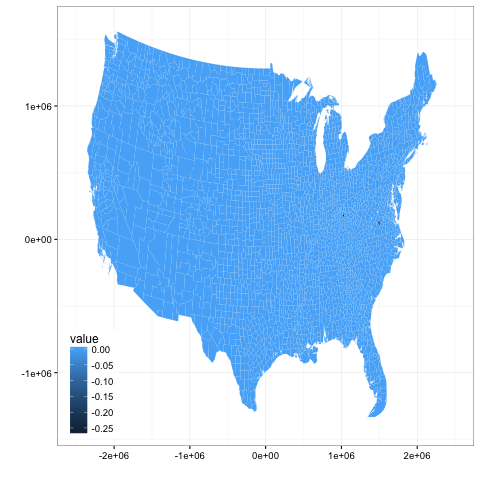

RCall.RObject{RCall.VecSxp}


In [15]:
df[:fips] = df[:FIPS]
df[:value] = convert(DataVector{Float64}, df[:TO_To] - df[:optsw] - df[:optgw])
usmap(df, true)

Where do we use more or less GW than recorded (since this is the current source of prices)?

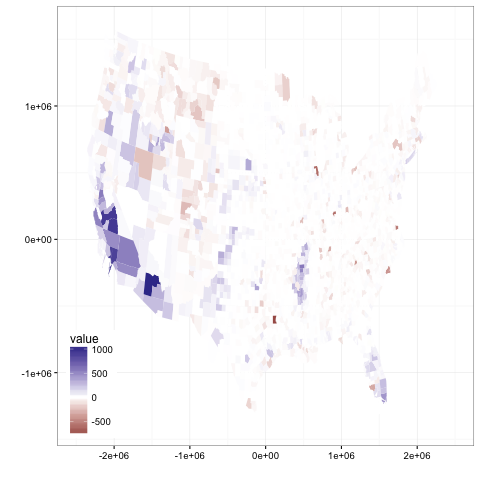

RCall.RObject{RCall.VecSxp}


In [18]:
df[:value] = convert(DataVector{Float64}, (df[:TO_GW] - df[:optgw]))
usmap(df, true)